In [1]:
import pandas as pd
import numpy as np

# Part I
## A.

In [2]:
# import database
df = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 3/bank_churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## B.

Categorical: RowNumber, CustomerID, Surname, Geography, Gender, HasCrCard, IsActiveMenber, Exited

Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

## C.

### a.
There are two categories here: "1" as leaving and "0" as staying. From the percentage we can see that exiting people are the majority in this dataset -- nearly 80%.

### b.
Oversampling is a data preprocessing technique used to address category imbalance in a dataset for machine learning models. So it could be a great way to balance in this project since exiting people are taking too many percentages here.

In [4]:
total = len(df)
count = df['Exited'].value_counts()
percentage = count / total * 100

exited_percent = pd.DataFrame(
{
    'Exited': [0,1],
    'Count': count,
    'Percentage': ["{:.2f}%".format(p) for p in percentage]
})
exited_percent

,Exited,Count,Percentage
0,0,7963,79.63%
1,1,2037,20.37%


## D.
## a.

"RowNumber" and "CustomerId" have all unique values, so I will remove these two column.

In [5]:
df_category = df[['RowNumber','CustomerId','Surname','Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']]
df_category.nunique()

RowNumber         10000
CustomerId        10000
Surname            2932
Geography             3
Gender                2
HasCrCard             2
IsActiveMember        2
Exited                2
dtype: int64

In [6]:
# remove categorical veriables that all values are unique
df2 = df.drop(['RowNumber','CustomerId'],axis =1)
df2.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## b.
As for "surname", it has 2,932 unique values, and is still a large proportion as a categorical variable. So I will also remove it.

In [7]:
df3 = df2.drop('Surname',axis =1)
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## c.

A categorical variable with entirely unique levels would be useless as an input for machine learning models because:

- No Generalization - The model cannot learn any meaningful patterns if every data point has a completely unique categorical value. There is no way to generalize to new data points.

- High Cardinality - A categorical variable with a very high number of levels (cardinality) can be problematic to model and lead to overfitting. Unique values would have maximum cardinality.

- High Dimensionality - Encoding a categorical variable to use it in a model expands its dimensionality based on number of levels. Unique values expand into many useless binary variables.

- Information Leakage - A categorical variable like customer ID that uniquely identifies data points can leak information about specific individuals, reducing generalizability.

- No Comparisons - Since every value is unique, the model cannot determine any relative relationships or similarities between data points.

## E.

There are no missing in this dataset.

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## F.

From the result of correlation matrix for numeric variables, there are no variables having stong relation to each other, so I will keep all variables

In [9]:
## select numeric variable for correlation matrix
numeric_variable = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_variable].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


## G.

In [10]:
# prepare table for logistic regression, outout is "Exited"
categorical_variable = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']
output_var = ['Exited']
all_variable = numeric_variable + categorical_variable
df_new = df[all_variable]
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,619,42,2,0.00,1,101348.88,France,Female,1,1,1
1,608,41,1,83807.86,1,112542.58,Spain,Female,0,1,0
2,502,42,8,159660.80,3,113931.57,France,Female,1,0,1
3,699,39,1,0.00,2,93826.63,France,Female,0,0,0
4,850,43,2,125510.82,1,79084.10,Spain,Female,1,1,0


In [11]:
# dummify categorical variable
dummy_variable = [i for i in categorical_variable if i != 'Exited']
df_dummy = pd.get_dummies(df_new,drop_first = True,columns =dummy_variable )
df_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1


## H.

I picked the random state value as 18 because the street I live is "18 shawmut terrace".

In [12]:
## create data patition
from sklearn.model_selection import train_test_split as tts
import random
X = df_dummy.drop(output_var, axis=1)
y = df_dummy[output_var]
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.4,random_state = 18)

In [13]:
# check whether the patition is correct
print(X_train.shape, X_test.shape, type(X_train), type(X_test))

(6000, 11) (4000, 11) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


## I.

From the comparision showed below, I think "Age", "Tenure", and "Balance" could have higher impact on customer leaving, since their means show obvious differences for those who exited and those who were not.

In [14]:
## check the mean of numeric variables
combine_training = pd.concat([X_train,y_train],axis = 1)
grouped = combine_training.groupby('Exited')
grouped[numeric_variable].describe().T.round(2)

Exited                         0          1
CreditScore     count    4780.00    1220.00
                mean      651.61     646.79
                std        95.73     101.04
                min       405.00     350.00
                25%       585.00     578.75
                50%       653.00     647.00
                75%       717.25     718.00
                max       850.00     850.00
Age             count    4780.00    1220.00
                mean       37.45      44.64
                std        10.10       9.66
                min        18.00      18.00
                25%        31.00      38.00
                50%        36.00      44.00
                75%        41.00      51.00
                max        92.00      71.00
Tenure          count    4780.00    1220.00
                mean        5.02       4.90
                std         2.89       2.95
                min         0.00       0.00
                25%         3.00       2.00
                50%         5.00       5.00
                75%         8.00       7.00
                max        10.00      10.00
Balance         count    4780.00    1220.00
                mean    74351.69   91230.56
                std     62678.66   58614.89
                min         0.00       0.00
                25%         0.00       0.00
                50%     94475.64  110435.34
                75%    127545.06  131384.56
                max    214346.96  250898.09
NumOfProducts   count    4780.00    1220.00
                mean        1.53       1.46
                std         0.51       0.80
                min         1.00       1.00
                25%         1.00       1.00
                50%         2.00       1.00
                75%         2.00       2.00
                max         3.00       4.00
EstimatedSalary count    4780.00    1220.00
                mean    99781.91   99100.62
                std     57558.35   57539.10
                min        90.07     417.41
                25%     50456.60   49683.95
                50%     99096.86   98287.79
                75%    148845.49  148465.04
                max    199970.74  199808.10

## Iteration I
### J.

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
# building logistic regression model with statemodels
logit_model = sm.Logit(y_train,sm.add_constant(X_train))

# fit the model
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.430472
         Iterations 6


### K. Examing model result

#### a. Numeric Variable
"CreditScore", "Tenure", and "EstimatedSalary" have hign p-value (>0.05), indicating they are not play strong roles in predicting if the customer will exit.

#### b. Categorical Variable
"HasCrCard" also shows high p-value (0.578). 

As for "Geography", though only the level of 'Spain' shows high p-value I will still remove the whole variable in the next model.

In [17]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5988
Method:                           MLE   Df Model:                           11
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.1476
Time:                        23:22:49   Log-Likelihood:                -2582.8
converged:                       True   LL-Null:                       -3029.9
Covariance Type:            nonrobust   LLR p-value:                1.092e-184
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.2736      0.315    -10.390      0.000      -3.891      -2.656
CreditScore          -0.0005      0.000     -1.360      0.174      -0.001       0.000
Age                   0.

## Iteration 2
### L. Build 2nd model after removing variable with high p-value in 1st model

#### a. 2nd model result
From the result below, the 2nd model also has a low p-value.

#### b. Numeric variable
In 2nd model, "NumOfProducts" has high p-value (0.354).

#### c. Categorical variable
All categorical variable have low p-value in 2nd model.


In [18]:
drop_variable = ['CreditScore','Tenure','EstimatedSalary','Geography_Germany','Geography_Spain','HasCrCard_1']
X_train_2 = X_train.drop(drop_variable,axis = 1)
logit_model_2 = sm.Logit(y_train,sm.add_constant(X_train_2))
result_2 = logit_model_2.fit()
print(result_2.summary())

Optimization terminated successfully.
         Current function value: 0.440128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5994
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.1284
Time:                        23:22:49   Log-Likelihood:                -2640.8
converged:                       True   LL-Null:                       -3029.9
Covariance Type:            nonrobust   LLR p-value:                5.652e-166
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.8283      0.185    -20.667      0.000      -4.191      -3.465
Age        

### M. Build 3rd model after removing variable with high p-value in 2nd model --> Final Model

In [19]:
drop_variable = ['CreditScore','Tenure','EstimatedSalary','Geography_Germany','Geography_Spain','HasCrCard_1','NumOfProducts']
X_train_3 = X_train.drop(drop_variable,axis = 1)
logit_model_3 = sm.Logit(y_train,sm.add_constant(X_train_3))
result_3 = logit_model_3.fit()
print(result_3.summary())

Optimization terminated successfully.
         Current function value: 0.440200
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5995
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.1283
Time:                        23:22:49   Log-Likelihood:                -2641.2
converged:                       True   LL-Null:                       -3029.9
Covariance Type:            nonrobust   LLR p-value:                5.848e-167
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9272      0.152    -25.872      0.000      -4.225      -3.630
Age        

### N. Using scikit-learn to build logistic regression model

In [20]:
## Using scikit-learn to build model
logmodel = LogisticRegression()
logmodel.fit(X_train_3, y_train.values.ravel())

LogisticRegression()

### O.

#### a. Accuracy Rate: 79.56%

#### b. Seneitivity Rate: 0%

#### c. Specificity Rate: 79.56%

#### d. Precision:  0%

#### e. Balanced Accuracy: 79.56%

In [21]:
X_test_3 = X_test.drop(drop_variable,axis = 1)

predictions2 = logmodel.predict(X_test_3)
accuracy_score(y_test, predictions2) 

0.79575

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score

# accuracy scoere
conf = confusion_matrix(predictions2,y_test)
print(conf)
total_conf = sum(sum(conf))
accuracy_model = (conf[1,1]+ conf[0,0])/ total_conf
print('The accuracy is: ',accuracy_model )

[[3183  817]
 [   0    0]]
The accuracy is:  0.79575


In [23]:
# sensativity
sensitivity_model = conf[1,1]/(conf[1,1]+conf[0,1])
print('The sensatiity is: ', sensitivity_model )

The sensatiity is:  0.0


In [24]:
# specificity
specificity = conf[0, 0] / (conf[0, 0] + conf[0, 1])
print('The specificity is: ', specificity )

The specificity is:  0.79575


In [25]:
# Precision
precision = precision_score(predictions2, y_test)
print('The precision is: ', precision )

The precision is:  0.0


In [26]:
# balance accuracy
balanced_accuracy = balanced_accuracy_score(predictions2, y_test)
print('The balanced accuracy is: ', balanced_accuracy )

The balanced accuracy is:  0.79575


/Users/leon/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


### P. Comparing training set with testing set

Purpose: detecting overfitting

Based on the accuracy rate of training set and testing set from my model, the rate is really similar -- indicating that my model is not overfit.

In [27]:
# Training 
predictions = logmodel.predict(X_train_3)
print('Training set is:',accuracy_score(y_train, predictions),'\nTesting set is:',accuracy_score(y_test, predictions2)   )

Training set is: 0.7966666666666666 
Testing set is: 0.79575


### Q. Predict a new customer

#### a. 
My model predicts my customer will leave.

#### b.
The probability of customer leaving is 74%.

In [28]:
# Create a new customer
mycustomer = pd.DataFrame({
    "RowNumber": 10001,
    "CustomerId": 555,
    "Surname": ['Leon'],
    "CreditScore": [730],
    'Geography': ['Spain'],
    'Gender': ['Male'],
    'Age': [35],
    'Tenure': [3],
    'Balance': [66666],
    'NumOfProducts': 3.0,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 90000
})
df_train = pd.concat([df.drop("Exited",axis = 1),mycustomer],ignore_index=True)
df_train[df_train["CustomerId"] == 555]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
10000,10001,555,Leon,730,Spain,Male,35,3,66666.0,3.0,1,1,90000.0


In [29]:
# prepare my customer
df_logit = df_train[['Age','Balance','Gender','IsActiveMember']]
mycustomer_dummy = pd.get_dummies(df_logit,drop_first=True,columns = ['Gender','IsActiveMember']).iloc[10000:10001,:]
mycustomer_dummy

,Age,Balance,Gender_Male,IsActiveMember_1
10000,35,66666.0,1,1


In [30]:
# Predict if my customer will leave or not
prediction_mycustomer = logmodel.predict(mycustomer_dummy)
print(prediction_mycustomer)

if prediction_mycustomer == 0:
    print("Customer will leave")
else:
    print("Customer will exit")

[0]
Customer will leave


In [31]:
# The probability that the customer will leave
prediction_mycustomer_prob = logmodel.predict_proba(mycustomer_dummy)
print('The probability that my customer will leave is: ', prediction_mycustomer_prob[0,0].round(2))

The probability that my customer will leave is:  0.74


### R.

If the value is outside of the range of training data, it might make our prediction not reliable, since Logistic regression models make assumptions about the relationship between the input variables (features) and the target variable based on the observed data, so using input values outside the range seen during training would require extrapolating beyond the available data, which can lead to unreliable predictions.

In [32]:
# check what numeric variable to use --> I decided to use choose a outlier for Balance
df[['Age','Balance']].describe()

,Age,Balance
count,10000.000000,10000.000000
mean,38.921800,76485.889288
std,10.487806,62397.405202
min,18.000000,0.000000
25%,32.000000,0.000000
50%,37.000000,97198.540000
75%,44.000000,127644.240000
max,92.000000,250898.090000


In [33]:
# set Age to 95 and balance to 400,000 which is larger than the max.
outlier = pd.DataFrame({
    'Age': [16],
    'Balance': [400000],
    'Gender_Male': [1],
    'IsActiveMember_1': [1]
})

print(outlier)

prediction_outlier = logmodel.predict(outlier)
if prediction_mycustomer == 0:
    print("Customer will leave")
else:
    print("Customer will exit")

   Age  Balance  Gender_Male  IsActiveMember_1
0   16   400000            1                 1
Customer will leave


# Part II Random Foresr Model
## S.

In [34]:
numeric_variable = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_variable = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']
output_var = ['Exited']
all_variable = numeric_variable + categorical_variable
df_rf = df[all_variable]

## T.

In [35]:
dummy_variable = [i for i in categorical_variable if i != 'Exited']
df_dummy_rf = pd.get_dummies(df_rf,drop_first = False,columns =dummy_variable )
df_dummy_rf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


## U.

In [36]:
## Patition the data
X_rf = df_dummy_rf.drop(output_var,axis = 1)
y_rf = df_dummy_rf[output_var]

Xrf_train, Xrf_test, yrf_train, yrf_test = tts(X_rf,y_rf, test_size=0.4,random_state = 18)

## V.

In [37]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(Xrf_train,yrf_train.values.ravel())

RandomForestClassifier()

In [38]:
## GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [12, 16, 20],
    'min_samples_leaf': [6, 10, 14],
}

from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(Xrf_train, yrf_train.values.ravel())
print(CV_rfc.best_params_)

{'max_depth': 8, 'max_features': 12, 'min_samples_leaf': 6, 'n_estimators': 50}


In [39]:
## using hyperparameter settings for model
clf=RandomForestClassifier(n_estimators=150, max_depth=10, max_features=12, min_samples_leaf=14, random_state=18)
clf.fit(Xrf_train,yrf_train.values.ravel())

RandomForestClassifier(max_depth=10, max_features=12, min_samples_leaf=14,
                       n_estimators=150, random_state=18)

## W. Variable ranking from random forest model

The result of the importance of variables is showned in below table, with "Age" as the 1st while "HasCrCard_1" as the last.

The higher the ranking, the more effective it is to seperate the data into distinct groups.

In [40]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, Xrf_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
1,0.350187,Age
4,0.239715,NumOfProducts
3,0.106956,Balance
13,0.056835,IsActiveMember_0
14,0.050306,IsActiveMember_1
0,0.048015,CreditScore
5,0.046660,EstimatedSalary
7,0.046190,Geography_Germany
2,0.027788,Tenure
10,0.007757,Gender_Male


## X. Performance of random forest model

### a. accuracy rate: 0.86

### b. sensitivity rate: 0.49

### c. specificity rate: 0.96

### d. precision: 0.76

### e. balanced accuracy: 0.72

In [41]:
predictions_rf_test = clf.predict(Xrf_test)

# Calculate the confusion matrix
confusion_rf = confusion_matrix(yrf_test, predictions_rf_test)

# Calculate accuracy
accuracy_rf = accuracy_score(yrf_test, predictions_rf_test)

# Calculate sensitivity (recall)
sensitivity_rf = recall_score(yrf_test, predictions_rf_test)

# Calculate specificity
specificity_rf = confusion_rf[0, 0] / (confusion_rf[0, 0] + confusion_rf[0, 1])

# Calculate precision
precision_rf = precision_score(yrf_test, predictions_rf_test)

# Calculate balanced accuracy
balanced_accuracy_rf = balanced_accuracy_score(yrf_test, predictions_rf_test)

# Print the results
print('Confusion Matrix: ','\n',confusion_rf,)
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Sensitivity (Recall): {sensitivity_rf:.2f}")
print(f"Specificity: {specificity_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_rf:.2f}")


Confusion Matrix:  
 [[3058  125]
 [ 420  397]]
Accuracy: 0.86
Sensitivity (Recall): 0.49
Specificity: 0.96
Precision: 0.76
Balanced Accuracy: 0.72


## Y. Comparing accuracy of RF model on training set and testing set

The accuracy of training set is 0.88, and that of testing set is 0.86. Two accuracies are pretty close, so I think my random forest model is not overfit.

In [42]:
predictions_rf_train = clf.predict(Xrf_train)
predictions_rf_test = clf.predict(Xrf_test)
print('Training set is:',accuracy_score(yrf_train, predictions_rf_train).round(2),'\nTesting set is:',accuracy_score(yrf_test, predictions_rf_test).round(2))

Training set is: 0.88 
Testing set is: 0.86


## Z. Predict my new customer will leave or not based on RF model

After using random forest model to predict my new customer, the model predict it will leave.

In [43]:
mycustomer_dummy_rf = pd.get_dummies(df_train,drop_first = False, columns = dummy_variable).iloc[10000:10001,:]
mycustomer_dummy_rf

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
10000,10001,555,Leon,730,35,3,66666.0,3.0,90000.0,0,0,1,0,1,0,1,0,1


In [44]:
prediction_mycustomer_rf = clf.predict(mycustomer_dummy_rf.drop(columns=['RowNumber','CustomerId','Surname']))

if prediction_mycustomer_rf == 0:
    print("Customer will leave")
else:
    print("Customer will exit")

Customer will exit


## AAA. How a bank could use my Logistic Regression Model and Random Forest Model

The bank could use the logistic regression model, which take less variables into consideration so could do a daily analysis due to consuming less computational burden, and probably found customers under 35, with low account balances, and no membership were most likely to leave. Then, this allows bank for targeting retention campaigns to young customers without paid memberships, or even identify this the same time when this young customers are making transaction at the same time. 

Since Random Forest model covers more detail with more computation, the bank could perform monthly analysis and probably found high-income customers with multiple products were less likely to leave even if other demographics predicted attrition. This shows the value of cross-selling additional products and services. 

# Part III Restaurant Customer Review Wordcloud

In Yelp, I found the reviews of one of the restaurant I went to before in Evanston, IL. The restaurant is called "NAKORN", then I choose 20 reviews to generate a workcloude (https://monkeylearn.com/word-cloud/).

From the workcloud I realize it highlight "service", meaning customers usually think service is an important thing, and the restaurant seems doing quite well since I did not see any bad review due to worst service. Also we can see "Chicken", probably indicating it is favored by most of the customers. Also, lots of people mention "good food", "flavor".

I think NAKORN can encourage its employees to maintain good service and stable quality of food. Maybe they could promote "chicken" series menus to boost customer satisfaction.

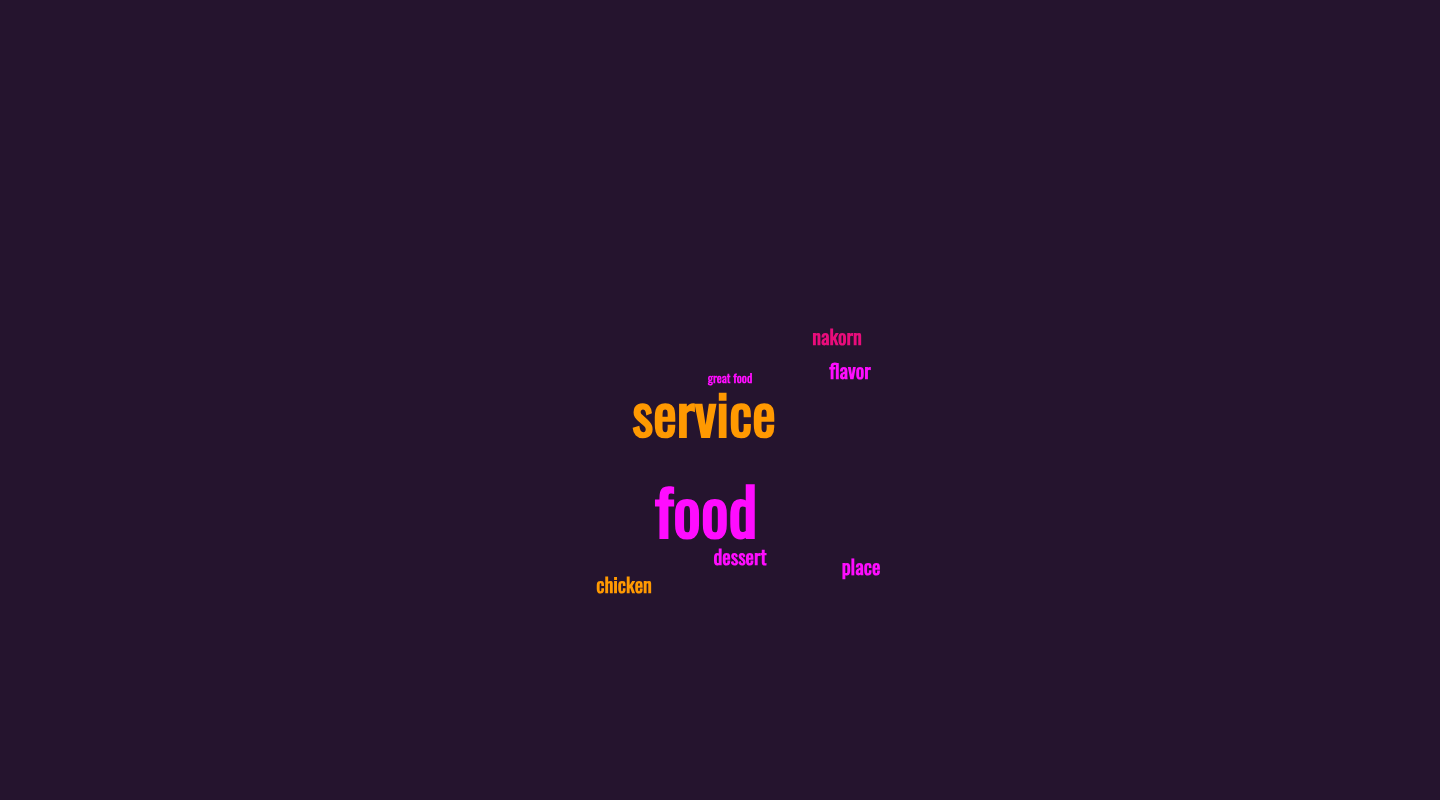